# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [96]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape) # training set
print('Test data:', X_test.shape, y_test.shape) # validation set

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## EDA

In [97]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

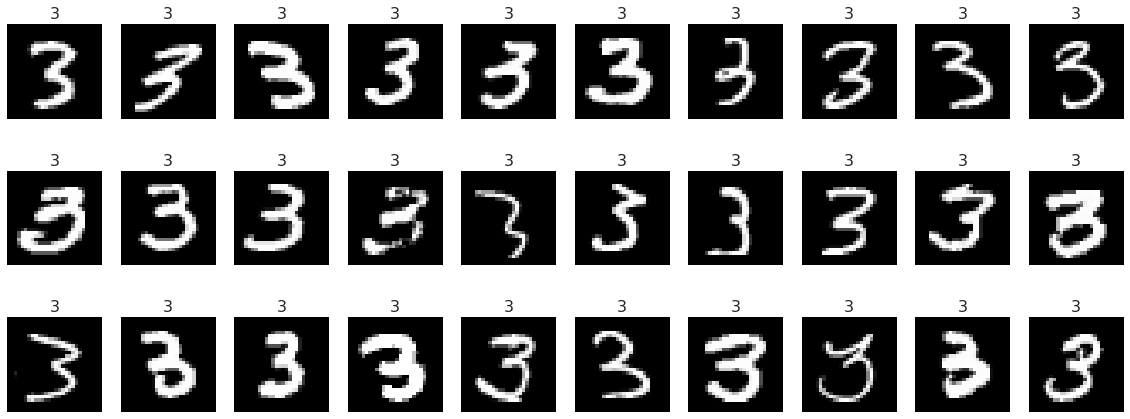

In [98]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(3, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

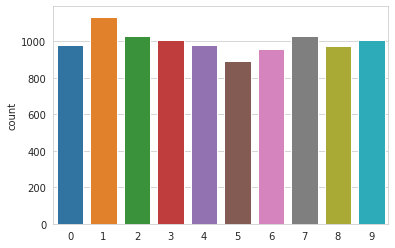

In [99]:
# Your code here
sns.countplot(y_test)

**Print out the range of pixel values (min, max)**

In [101]:
print("Pixel value range:", np.min(X_train), np.max(X_train))

Pixel value range: 0 255


## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

In [102]:
n_samples = 2000
n_test_samples = 400
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)
print(X_train_flat.shape,X_test_flat.shape)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

(2000, 28, 28) (400, 28, 28)


In [103]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (2000, 784)
Test data (400, 784)


In [ ]:
# Get all the data
# Run it after you finish training with the 2000 samples
# X_train_flat = X_train.reshape((-1, 784))
# X_test_flat = X_test.reshape((-1, 784))
# y_train_flat = y_train
# y_test_flat = y_test

# print('Training data', X_train_flat.shape)
# print('Test data', X_test_flat.shape)
# print('Training label', y_train_flat.shape)
# print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


## Train models

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

In [105]:
### LINEAR SVM
clf = SVC(kernel='linear', C=0.1)
clf.fit(X_train_flat, y_train_flat)

predicted = clf.predict(X_test_flat)

# get the accuracy
print("Accuracy Score Linear SVM: ", accuracy_score(y_test_flat, predicted))

Accuracy Score Linear SVM:  0.905


In [106]:
### Kernel SVM
clf1 = SVC(kernel='rbf', C=10)

clf1.fit(X_train_flat, y_train_flat)

predicted = clf1.predict(X_test_flat)

# get the accuracy
print("Accuracy Score Kernel SVM: ", accuracy_score(y_test_flat, predicted))




Accuracy Score Kernel SVM:  0.945


You can use GridSearch to find the best set of hyperparameters. Take a look at GridSearchCV from Sklearn here (look at the example at the end): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [107]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

In [108]:
# Your code here

gridsearch_models = GridSearchCV(svc, parameters, cv = 5, n_jobs = -1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
# print out the results
pd.DataFrame(gridsearch_models.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.113119,0.008100,0.402409,0.005581,1,linear,"{'C': 1, 'kernel': 'linear'}",0.9200,0.8975,0.8875,0.8975,0.9100,0.9025,0.011292,3
1,2.160509,0.016188,0.566079,0.005712,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9450,0.9175,0.9300,0.9325,0.9400,0.9330,0.009407,2
2,1.112991,0.010540,0.402292,0.006307,10,linear,"{'C': 10, 'kernel': 'linear'}",0.9200,0.8975,0.8875,0.8975,0.9100,0.9025,0.011292,3
3,2.127644,0.025586,0.555811,0.004075,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.9475,0.9325,0.9375,0.9450,0.9525,0.9430,0.007141,1


In [110]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'kernel': 'rbf'}
Best score 0.943


In [111]:
best_model = gridsearch_models.best_estimator_ # Model has been trained already. Cucial step.


## Evaluation

**Get the predictions on test data**

In [112]:
# Your code here
predictions = best_model.predict(X_test_flat)# predictions on test set
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.945


**Plot the confusion matrix in form of a heatmap**

In [113]:
confusion = confusion_matrix(y_test_flat, predictions)
confusion

array([[36,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 41,  1,  1,  0,  0,  0,  2,  0],
       [ 1,  0,  2, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  1,  0,  0,  2],
       [ 0,  0,  0,  1,  1, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 28,  0],
       [ 1,  0,  0,  1,  2,  0,  0,  1,  1, 40]])

Text(0.5, 1.0, 'Accuracy Score: 94.5%')

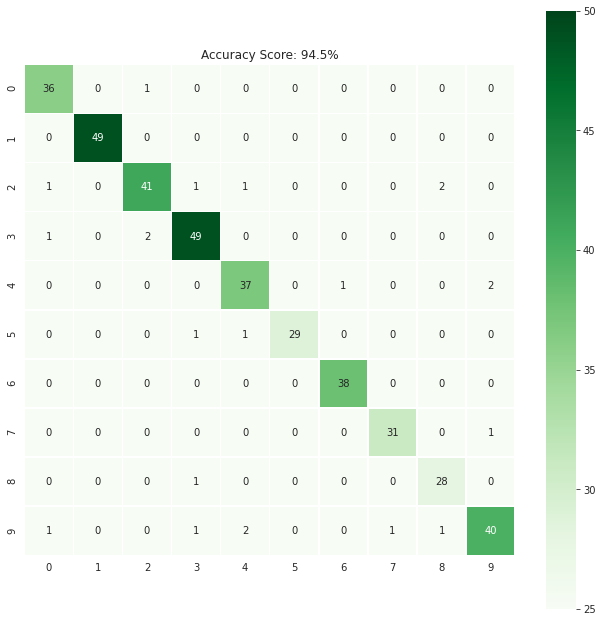

In [119]:
plt.figure(figsize=(11,11))
sns.heatmap(confusion, cbar=True, square= True, annot = True, linewidths=.5, vmin=25, vmax=50, cmap="Greens")
plt.title("Accuracy Score: 94.5%")

**Plot the samples that the model predicts incorrectly**

# Plotting Incorrect Model Predictions

In [116]:
mask = y_test_flat != predictions
sum(mask)

22

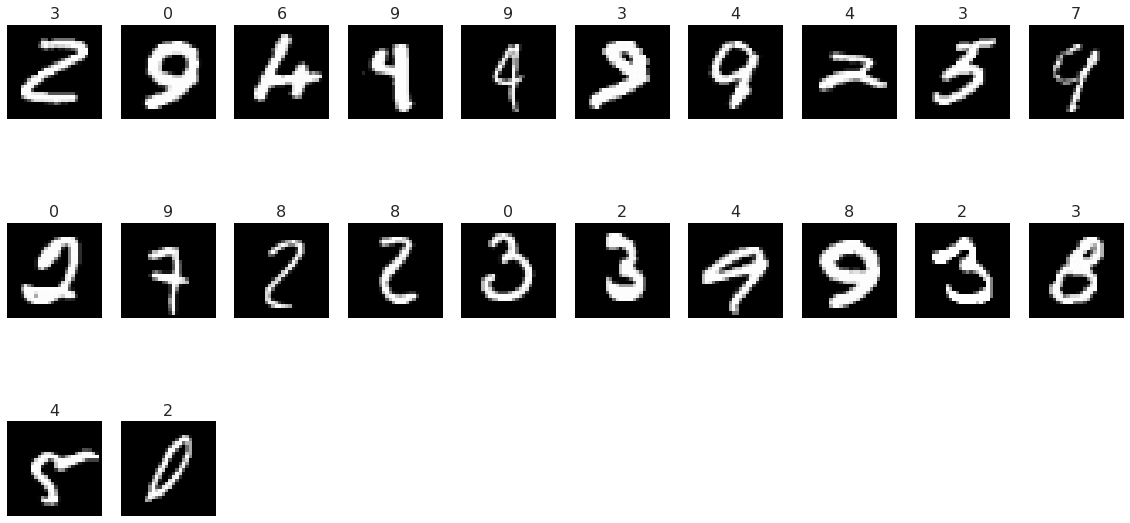

In [117]:
# Your code here
plot_images(X_test_flat[mask].reshape((22, 28,28)), predictions[mask])        


## Save model

In [118]:
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

**Re-load model for testing**

In [ ]:
# Your code here
with open('svm_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.78
